<a href="https://colab.research.google.com/github/choiboy92/ImperialML/blob/main/Tutorial%203/Tutorial3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Regression - coursework

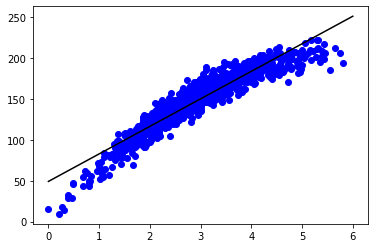

In [14]:
# Linear Regression

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import pandas

df = pandas.read_csv('http://pogo.software/me4ml/xray.csv')
x = np.array(df['Distance (mm)'][:])
y = np.array(df['Total absorption'][:])

# n.b. len(x) = 1000
A = np.array([[np.sum(x), np.sum(x**2)],
              [len(x), np.sum(x)]])

b = np.array([[np.dot(x,y)],[np.sum(y)]])

beta = np.linalg.solve(A, b)
b1 = beta[0][0]   # the y intercept
b2 = beta[1][0]   # the gradient

xval = np.linspace(0,6, 200)
linRegression = b1 + b2*xval
plt.plot(xval,linRegression, color="black")
ax.scatter(x,y,color="blue")
plt.show()

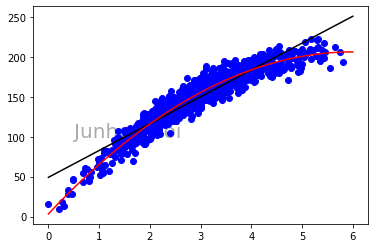

In [16]:
# Higher order regression

import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
import pandas

# n.b. len(x) = 1000
A = np.array([[np.sum(x**2), np.sum(x**3), np.sum(x**4)],
              [np.sum(x), np.sum(x**2), np.sum(x**3)],
              [len(x), np.sum(x), np.sum(x**2)]])

b = np.array([[np.dot(x**2,y)], [np.dot(x,y)], [np.sum(y)]])

beta = np.linalg.solve(A, b)
b1 = beta[0][0]   # the y intercept
b2 = beta[1][0]   # x coefficient
b3 = beta[2][0]   # x^2 coefficient
xval = np.linspace(0,6, 200)
higherRegression = b1 + b2*xval + (b3*(xval**2))
plt.plot(xval,linRegression, color="black")
plt.plot(xval, higherRegression, color="red")
ax.scatter(x,y,color="blue")
plt.text(0.5,100,'Junho Choi', size=20, zorder=0., color='#aaaaaa')
plt.show()

## Using Scikit-learn to perform regression

In [21]:
import pandas
import numpy as np

# read in the CSV file
df = pandas.read_csv('http://pogo.software/me4ml/hdpeVel.csv')
# set the 'index' column as the one containing the temperature values
df = df.set_index('T/C f/MHz')
# extract the frequency values (and scale since they are MHz)
freq = df.columns.values.astype(np.float) * 1e6
# extract the temperature values
temp = df.index.values.astype(np.float)
# extract the main part - the velocity values
vel = df.to_numpy()
# calculate the total number of values
tot_values = len(freq) * len(temp)

# values are in a grid format --> need to change to 
# standard parameter and output vector formats
x1grid, x2grid = np.meshgrid(freq, temp)
Xgrid = np.concatenate([x1grid.reshape([tot_values, 1]),
        x2grid.reshape([tot_values, 1])], axis=1)
ygrid = vel.reshape([tot_values, 1]) # reshape grid ooutputs to a single column vector


In [22]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(Xgrid, ygrid)

y_lin = reg.predict(Xgrid)

import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=ygrid[:, 0],
mode='markers', marker=dict(size=2, color='#000000', symbol='x')))
fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=y_lin[:, 0],
mode='markers', marker=dict(size=3, color='#ff0000', symbol='circle')))

# true data is black
# linear fitted data is red

In [28]:
# Polynomial fitting from linear regression
# higher order fitting from adding additional parameters
# e.g. x_1' = x_1^2

from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 2)
# generate the new feature vector
X_poly = poly.fit_transform(Xgrid)
print(Xgrid.shape)    # original parameter vector
print(X_poly.shape)   # check larger shape 2 vs 6 columns (more parameters)
print(poly.powers_)   # confirm feature generations


reg_poly = LinearRegression()
reg_poly.fit(X_poly, ygrid)   # produce model coefficients from training

# predict output of training data from these coefficients
y_poly_lin = reg_poly.predict(X_poly)

# plot polynomial regression in green on top
fig.add_trace(go.Scatter3d(x=Xgrid[:, 0], y=Xgrid[:, 1], z=y_poly_lin[:, 0],
mode='markers', marker=dict(size=3, color='#00ff00', symbol='diamond')))


(30, 2)
(30, 6)
[[0 0]
 [1 0]
 [0 1]
 [2 0]
 [1 1]
 [0 2]]
